# WorkShop 5 - TEXT CLASSIFICATION USING NAIVE BAYES
Date: March 5, 2021

Student name: Xinwei Fan (920863200)

Reference: https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73

In [27]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud 
from math import log, sqrt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## 1. Create a toy labeled dataset
This dataset have 10 sentences with a class label associated with each datapoint. There should be at least 2 classes: spam vs ham.

In [29]:
items = pd.read_csv('spam-small.csv', encoding='latin-1')
print(items)

     v1                                                 v2
0  spam  Had your mobile 11 months or more? U R entitle...
1  spam  07732584351 - Rodger Burns - MSG = We tried to...
2  spam  Congrats! 1 year special cinema pass for 2 is ...
3  spam  You'll not rcv any more msgs from the chat svc...
4  spam  FreeMsg Why haven't you replied to my text? I'...
5   ham                      Ok lar... Joking wif u oni...
6   ham  U dun say so early hor... U c already then say...
7   ham                         Oh k...i'm watching here:)
8   ham  I'm back &amp; we're packing the car now, I'll...
9   ham  Hello! How's you and how did saturday go? I wa...


## 2. Use Naive Bayes to do text classification

### 2.1 Calculate the prior probabilities

## 3. Test on a large dataset
My dataset: https://www.kaggle.com/uciml/sms-spam-collection-datase

In [ ]:
items = pd.read_csv('spam-large.csv', encoding='latin-1')
print(items)

### 1.1 Split the whole dataset into train_dataset and test_dataset
- random choice 80% of the dataset as train_dataset 
- random choice 20% of the dataset as test_dataset 

In [5]:
# get the size=5772 of the dataset
len_dataset = dataset.shape[0]
print("the number of total dataset", len_dataset, '\n')

train_idx, test_idx = [], []
for idx in range(len_dataset):
    if np.random.uniform(0,1) < 0.8:
        train_idx += [idx]
    else:
        test_idx += [idx]
        
print("the number of train dataset: ", len(train_idx))
print("the number of test dataset: ", len(test_idx))
print("variy the tota number of dataset", len(train_idx) + len(test_idx), '\n')

train_dataset = dataset.loc[train_idx]
test_dataset = dataset.loc[test_idx]
print("the size of TRAIN dataset", train_dataset.shape)
print("the size of TEST dataset", test_dataset.shape)

the number of total dataset 5572 

the number of train dataset:  4435
the number of test dataset:  1137
variy the tota number of dataset 5572 

the size of TRAIN dataset (4435, 2)
the size of TEST dataset (1137, 2)


### 1.2 Visualizing spam and ham dataset

In [3]:
# delete col 2-4
dataset = items.drop(items.columns[[2, 3, 4]], axis=1)
dataset.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


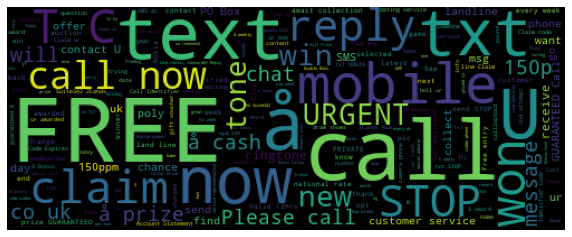

In [17]:
spam_word = ' '.join(list(dataset[dataset['v1'] == 'spam']['v2']))
spam_wc = WordCloud(width = 500, height = 200).generate(spam_word)
plt.figure(figsize = (10, 8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

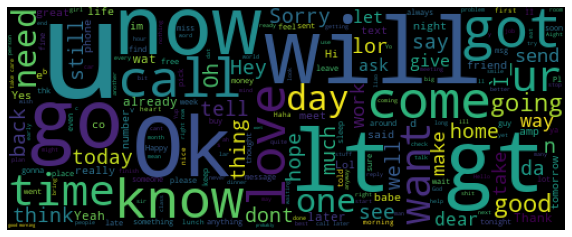

In [19]:
ham_word = ' '.join(list(dataset[dataset['v1'] == 'ham']['v2']))
ham_wc = WordCloud(width = 500, height = 200).generate(ham_word)
plt.figure(figsize = (10, 8))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

### 2.2 Calculate the conditional probabilities
Calculate the conditional probabilities of each word (with respect to both the categories) in the dataset.

### 2.3 Prediction
- Using the probabilities calculated before and Naive Bayes classification, predict the class of the input sentence. 
- Calculate the probability of the input sentence being in different classes. The class having the highest probability will be the output class.